<h1>Data Wrangling</h1>

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import scipy.stats as stats

<h2>Read in the data</h2>

In [66]:
#pd.read_csv()
#pd.read_csv(header=None) #for data with no header row.

#fill in the headers as things are read in.
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv("auto.csv", header=None, names=headers)

In [67]:
#How to fill in missing headers after the fact.
#headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
#         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
#         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
#         "peak-rpm","city-mpg","highway-mpg","price"]
#df.columns = headers

<h2>Get a sense of the data</h2>

In [68]:
#Describe

#df.describe() # only numeric columns
#df[['bore','stroke']].describe() # describe only certain columns
#df.describe(include=['object']) # describe only object columns
df.describe(include="all") # every column

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [69]:
#see the representation of categories in the categorical variables
print(df["fuel-type"].value_counts())
print("")
print(df["aspiration"].value_counts())
print("")
print(df["drive-wheels"].value_counts())

gas       185
diesel     20
Name: fuel-type, dtype: int64

std      168
turbo     37
Name: aspiration, dtype: int64

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64


In [70]:
#unique
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [71]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h2>Mitigate problematic values</h2>

In [72]:
#There are some question marks in there.  Data entry allowed someone to enter question marks.
#Replace them with NaN "Not a Number", to look more like empty fields, which will be dealt with in a subsequent step.
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h2>Identify missing values</h2>

In [73]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In the results above, each column has 205 rows of data, and seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

<h2>Deal with missing values</h2>

In [75]:
#Possible options include:
#Try to find the missing data by consulting the source.
#Remove the data that has the missing piece.
#Usually not a whole column unless most of the data in the column is missing.
#The whole variable or just the row with the missing element.
#Especially should drop a row if the target value is missing and needing supervised learning.
#Replace the missing data with a guess, such as the average or most common value of the other data.
#The source of the data might have extra knowledge about the data.  Something like "that field is often missing on older cars".
#Leave it missing.

In [76]:
#dropping rows with missing data.
#axis=0 means drop an entire row
#axis=1 means drop an entire column
#inplace=True means write the results back into the dataframe.
#in this example it is dropping a row from the "price" column.
#df.dropna(subset=["price"], axis=0, inplace=True)
#doing this without inplace=True won't change the data, but can display it during testing.
# reset index, because we droped two rows
#df.reset_index(drop=True, inplace=True)

In [77]:
#For example, where is how lab DA0101EN-Review-Data_Wrangling-py-v4pp.ipynb handled these...

# "normalized-losses": 41 missing data, replace them with mean
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
#print("Average of normalized-losses:", avg_norm_loss)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

# "bore": 4 missing data, replace them with mean
avg_bore=df['bore'].astype('float').mean(axis=0)
#print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

# "stroke": 4 missing data, replace them with mean
avg_stroke=df['stroke'].astype('float').mean(axis=0)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

# "horsepower": 2 missing data, replace them with mean
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
#print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

# "peak-rpm": 2 missing data, replace them with mean
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
#print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

# "num-of-doors": 2 missing data, replace them with "four".
# Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur
#print(df['num-of-doors'].value_counts())
#print(df['num-of-doors'].value_counts().idxmax())
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

# simply drop any row with NaN in "price" column.
# Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; 
#  therefore any row now without price data is not useful to us
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h2>Correct data format</h2>
Make sure they are all workable.

In [78]:
df.dtypes # to see the types

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [79]:
#Replacing the data type of an entire column.
df[["price"]] = df[["price"]].astype("float")
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df["horsepower"]=df["horsepower"].astype(int, copy=True)

In [80]:
#see results of correction
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h2>Data Standardization</h2>
Make sure the values are in the same format, unit, or convention.

In [81]:
#This is an example of applying the same computation or formula on the value of every row in an entire column.
df["city-mpg"]= 235/df["city-mpg"]

# Change the column heading to reflect what changed.
df.rename(columns={"city_mpg": "city-L/100km"}, inplace=True)

<h2>Data normalization</h2>
Centering, Scaling

In [82]:
#It may involve changing all values for a column to be between zero and one.
#While each value retains the same proportions with other values in the column.
#But the range of values in any given column doesn't overpower the values in other columns.

In [83]:
#simple scaling
df["length"] = df["length"]/df["length"].max()
#min-max
df["length"] = (df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())
#z-score.  Mostly -3 to +3.
df["length"] = (df["length"]-df["length"].mean())/df["length"].std()

<h2>Binning</h2>

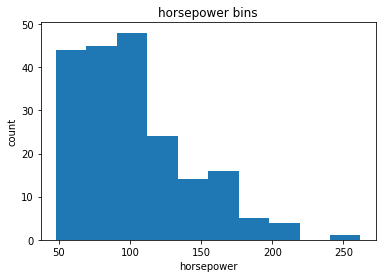

In [84]:
#histograph of a field to get an idea what bins might be there.
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
pyplot.show()

In [85]:
#Based on the above decide there will be 3 bins.  High, Medium, and Low horsepower.
#The bins should cover equal sized ranges within the entire range of a values.
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)  # four equally spaced numbers covering the whole range of prices.
 #One number on each end, with two more in between that split the range into 3 equally sized areas between the numbers.
print (bins)

[ 48.         119.33333333 190.66666667 262.        ]


In [86]:
#Name each bin.
group_names = ["Low","Medium","High"]
#Create the bin values based on the bounding numbers and the names and place the result into a new column.
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
#Seeing the number of items in each bin
df[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [87]:
#See the total count of how many ended up in each bin.
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

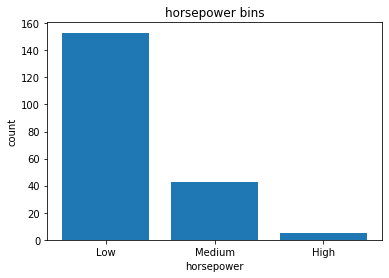

In [88]:
#Plot the distribution of each bin
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
pyplot.show()

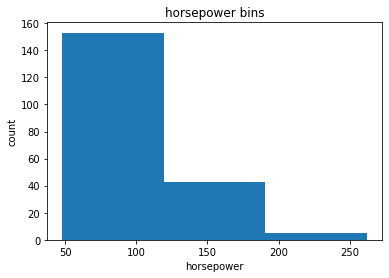

In [89]:
#Use a histogram to visual the bins
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
pyplot.show()

<h2>Indicator variables</h2>
AKA "Dummy variables"
Turn categorical values to quantitative (numeric) variables

In [90]:
#see how many of each category in a categorical variable
print(df["fuel-type"].value_counts())
print("")
print(df["aspiration"].value_counts())

gas       181
diesel     20
Name: fuel-type, dtype: int64

std      165
turbo     36
Name: aspiration, dtype: int64


In [91]:
#One-hot encoding adds a column with a 0,1 flag for each category in another column.
#The new columns are "dummy variables" or "indicator variables".
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [92]:
#Change column names if necessary or desired.
dummy_variable_1.rename(columns={'diesel':'IsFuelDiesel', 'gas':'IsFuelGas'}, inplace=True)
dummy_variable_1.head()

,IsFuelDiesel,IsFuelGas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [93]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)
# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,IsFuelDiesel,IsFuelGas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,-0.438315,...,2.68,9.0,111,5000.0,11.190476,27,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,-0.438315,...,2.68,9.0,111,5000.0,11.190476,27,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,-0.243544,...,3.47,9.0,154,5000.0,12.368421,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.194690,...,3.40,10.0,102,5500.0,9.791667,30,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.194690,...,3.40,8.0,115,5500.0,13.055556,22,17450.0,Low,0,1


In [94]:
# The aspiration column has "std" and "turbo" values that could benefit from indicator variables as well.

In [95]:
aspiration_dummy = pd.get_dummies(df["aspiration"])
df = pd.concat([df, aspiration_dummy], axis=1)
df.drop("aspiration", axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,IsFuelDiesel,IsFuelGas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,-0.438315,64.1,...,111,5000.0,11.190476,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,-0.438315,64.1,...,111,5000.0,11.190476,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,-0.243544,65.5,...,154,5000.0,12.368421,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.194690,66.2,...,102,5500.0,9.791667,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.194690,66.4,...,115,5500.0,13.055556,22,17450.0,Low,0,1,1,0


<h2>save the adjusted data</h2>

In [96]:
#Not actually saving it, to avoid cluttering up the notebook folder.

#df.to_csv("automobile.csv", index=False)

<h2>Exploratory Data Analysis</h2>
Now that the data is cleaned up, take a deeper look at it.

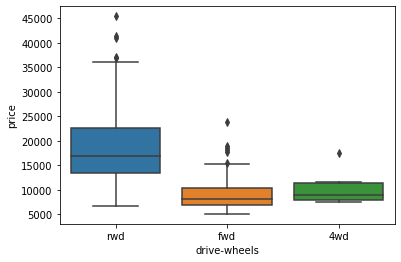

In [97]:
#Box plots
#Distribution of categories in relation of another value
sns.boxplot(x="drive-wheels",y="price",data=df)

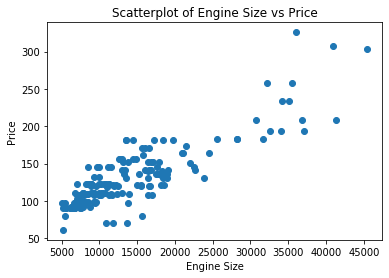

In [98]:
#Scatterplot
#How do two continuous values relate to each other?
y=df["engine-size"]
x=df["price"]
pyplot.scatter(x,y)
pyplot.title("Scatterplot of Engine Size vs Price")
pyplot.xlabel("Engine Size")
pyplot.ylabel("Price")
pyplot.show()

In [99]:
#group by
df_subset_for_grouping = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_subset_for_grouping.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [100]:
#pivot the results of the group by to group by a different column
df_pivot = df_grp.pivot(index = 'drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

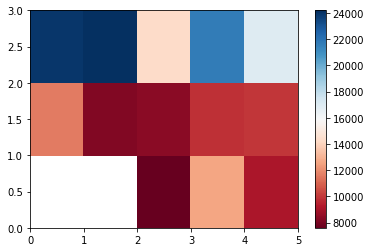

In [101]:
#heatmap
pyplot.pcolor(df_pivot, cmap='RdBu')
pyplot.colorbar()
pyplot.show()

<h2>Analysis of Variance (ANOVA)</h2>

In [102]:
#Make a function to abstract a conclusion
def interpret_anova(f,p):
    #When F < 1 and p > 0.05 then it means the variance between the group is not significantly different.
    #The average means of the two groups are similar,
    #and whatever difference there is is probably due to variance within each group more than differences.
    significant_difference = True
    if f < 1:
        if p > 0.05:
            significant_difference = False
    if significant_difference:
        print("Significant difference")
    else:
        print("The difference is not significant")
    return
#Make a function to analyze anova
def anova (make1, make2):
    df_anova=df[["make", "price"]]
    grouped_anova=df_anova.groupby(["make"])
    f,p = stats.f_oneway(grouped_anova.get_group(make1)["price"], grouped_anova.get_group(make2)["price"])
    print("-----")
    print(make1, make2)
    print("-----")
    print("")
    print("F =")
    print(f)
    print("F = Variation between sample group means / variation within sample group")
    print("")
    print("P =")
    print(p)
    print("Confidence degree.  Gets higher the more F is due to the groups actuall being different than each other.")
    print("")
    interpret_anova(f,p)
    return

In [103]:
anova("honda","subaru")

-----
honda subaru
-----

F =
0.19744030127462606
F = Variation between sample group means / variation within sample group

P =
0.6609478240622193
Confidence degree.  Gets higher the more F is due to the groups actuall being different than each other.

The difference is not significant


In [104]:
anova("honda","jaguar")

-----
honda jaguar
-----

F =
400.925870564337
F = Variation between sample group means / variation within sample group

P =
1.0586193512077862e-11
Confidence degree.  Gets higher the more F is due to the groups actuall being different than each other.

Significant difference


<h2>Correlation</h2>

In [105]:
#define a correlation function.
def correlate(attribute1, attribute2):
    sns.regplot(x=attribute1, y=attribute2, data=df) #regplot = Scatterplot with Regression line
    pyplot.ylim(0,)
    pyplot.title(attribute1 + " vs " + attribute2)
    pyplot.xlabel(attribute1)
    pyplot.ylabel(attribute2)
    pyplot.show()

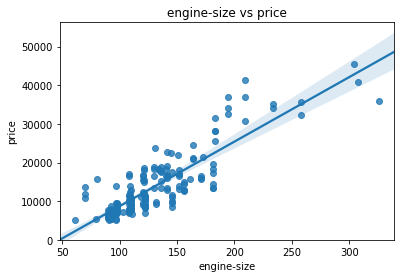

In [106]:
#examine correlation between engine size and price.
#Positive linear relationship.
#A steep line indicates a good correlation.
#If positive direction, they have a positive correlation.  The one tends to increase the other.
correlate("engine-size", "price")

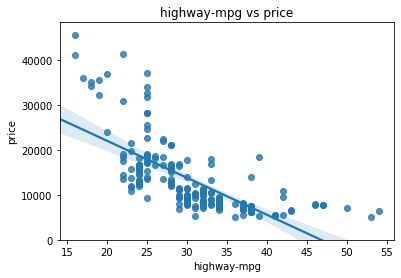

In [107]:
#examine correlation between Highway MPG and Price.
#Negative linear relationship.
#A steep line, even in the negative direction, indicates a good correlation.
#If negative direction, they have a negative correlation.  The one tends to decrease the other.
correlate("highway-mpg", "price")

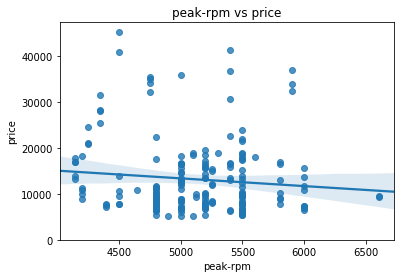

In [108]:
#examine correlation between peak-rm and price.
#Non-linear relationship.
#A shallow sloped line, indicates a weak correlation.
correlate("peak-rpm", "price")

<h3>Pearson Correlation</h3>
<br/>
Yields:
<ul>
<li>Correlation coefficient</li>
<li>P-value</li>
</ul>

In [109]:
#Correlation coefficient gets closer to +1 when there is a large positive relationship.
#It gets closer to -1 when there is a large negative relationship.
#Zero means no relationship.

In [110]:
#P-value < 0.001 Strong certainty
#P < 0.05 Moderate certainty
#P < 0.1 Weak certainty
#P > 0.1 No certainty.

In [111]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(pearson_coef, p_value)

0.8096068016571052 6.273536270651004e-48


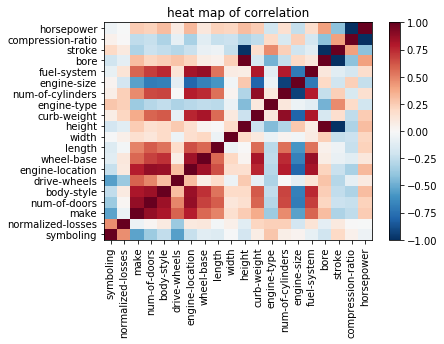

In [114]:
#heat map of correlation
fig, ax = pyplot.subplots()
AllForHeat = df.corr()
im = ax.pcolor(AllForHeat, cmap='RdBu_r') #Reverse the red/blue colormap

#label names
row_labels = df.columns
col_labels = df.columns

#move ticks and labels to the center.
ax.set_xticks(np.arange(AllForHeat.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(AllForHeat.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)

ax.set_title("heat map of correlation")

#rotate label if too long
pyplot.xticks(rotation=90)
pyplot.colorbar(im)
pyplot.show()